In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../azure_trace/AzureFunctionsInvocationTraceForTwoWeeksJan2021.txt')

In [4]:
df['start_ts'] = df['end_timestamp'] - df['duration']

In [37]:
testdf = df[df['app'] == 'a594f92f84072b4cd031fe5283d1781a6e98f430696dec0a8e3b02eadb5fc0b8'].copy()

In [38]:
testdf.sort_values(by='start_ts')

,app,func,end_timestamp,duration,start_ts
956,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,6.429979e+03,0.611,6.429368e+03
957,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,6.430787e+03,0.171,6.430616e+03
958,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,6.430968e+03,0.007,6.430961e+03
959,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,6.432314e+03,0.006,6.432308e+03
960,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,6.432591e+03,0.001,6.432590e+03
...,...,...,...,...,...
1980946,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209597e+06,0.001,1.209597e+06
1980947,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209598e+06,0.001,1.209598e+06
1980948,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209599e+06,0.001,1.209599e+06
1980949,a594f92f84072b4cd031fe5283d1781a6e98f430696dec...,155e47f8e7f751d0c845049456d01832013c61336a8cd8...,1.209599e+06,0.001,1.209599e+06


In [52]:
testdf['start_ts_norm']=testdf['start_ts'] - testdf['start_ts'].min()

In [46]:
tdf = testdf.set_index('start_ts_norm')

In [60]:
testdf['intvals'] = testdf['start_ts_norm'].astype('int')

In [70]:
testdf['dt'] = pd.to_datetime(testdf['start_ts_norm']*10**9)

/var/folders/3h/6qy5vdjs17j0sdf05d1n8vl40000gn/T/ipykernel_829/1809016794.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.arange(len(x)))


[Text(0.0, 0, '0'),
 Text(2.0, 0, '1'),
 Text(4.0, 0, '2'),
 Text(6.0, 0, '3'),
 Text(8.0, 0, '4'),
 Text(10.0, 0, '5'),
 Text(12.0, 0, '6'),
 Text(14.0, 0, '7')]

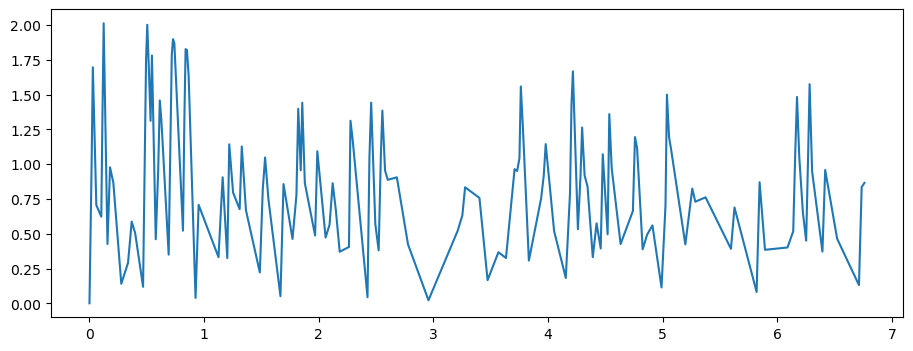

In [106]:
tdf = testdf.set_index('dt')
x = tdf['start_ts_norm'].rolling('1h').count()[::3600]/3600
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(x)
ax.set_xticklabels(np.arange(len(x)))

In [118]:

b1 = 0
b2 = 0
for i in range(50):
    v = np.random.rand(1)
    if v > 0.7:
        b1+=1
    else:
        b2+=1
    

In [119]:
b1/50, b2/50

(0.36, 0.64)